In [0]:
%tensorflow_version 2.x
from tensorflow import keras
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

In [2]:
(train_data, train_targets), (test_data, test_targets) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
train_data.shape, test_data.shape

((25000,), (25000,))

In [11]:
from collections import Counter
Counter(train_targets)

Counter({0: 12500, 1: 12500})

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))
  
  for i, sequence in enumerate(sequences):
    for word_idx in sequence: 
      result[i, word_idx] += 1
  return result

In [0]:
X_train = vectorize_sequences(train_data[5000:])
X_valid = vectorize_sequences(train_data[:5000])
X_test = vectorize_sequences(test_data)

In [0]:
y_train = train_targets[5000:]
y_valid = train_targets[:5000]
y_test = test_targets

In [17]:
Counter(X_train[0])

Counter({0.0: 9911, 1.0: 69, 2.0: 11, 3.0: 4, 4.0: 4, 5.0: 1})

In [29]:
model = keras.Sequential([
                          keras.layers.Dense(16, activation="relu", input_shape=(10000,)),
                          keras.layers.Dense(16, activation="relu"),
                          keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20, batch_size=512, 
                    validation_data=(X_valid, y_valid))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 116us/sample - loss: 0.5297 - accuracy: 0.7564 - val_loss: 0.3828 - val_accuracy: 0.8740
Epoch 2/20
20000/20000 [==============================] - 2s 91us/sample - loss: 0.3229 - accuracy: 0.8911 - val_loss: 0.4831 - val_accuracy: 0.8002
Epoch 3/20
20000/20000 [==============================] - 2s 91us/sample - loss: 0.2464 - accuracy: 0.9171 - val_loss: 0.2913 - val_accuracy: 0.8934
Epoch 4/20
20000/20000 [==============================] - 2s 92us/sample - loss: 0.2040 - accuracy: 0.9319 - val_loss: 0.2855 - val_accuracy: 0.8952
Epoch 5/20
20000/20000 [==============================] - 2s 90us/sample - loss: 0.1741 - accuracy: 0.9398 - val_loss: 0.3261 - val_accuracy: 0.8774
Epoch 6/20
20000/20000 [==============================] - 2s 90us/sample - loss: 0.1491 - accuracy: 0.9489 - val_loss: 0.2909 - val_accuracy: 0.8956
Epoch 7/20
20000/20000 [==============================] 

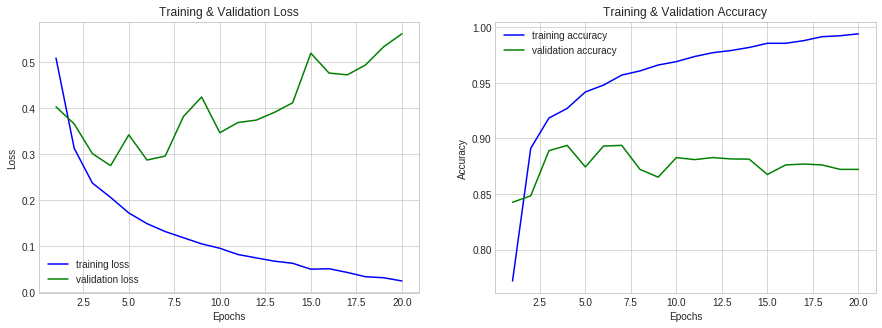

In [25]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(figsize=(15, 5), ncols=2, nrows=1)
ax[0].plot(epochs, loss, "b", label="training loss")
ax[0].plot(epochs, val_loss, "g", label="validation loss")
ax[0].set(title="Training & Validation Loss", xlabel="Epochs", ylabel="Loss")
ax[0].legend()

ax[1].plot(epochs, acc, "b", label="training accuracy")
ax[1].plot(epochs, val_acc, "g", label="validation accuracy")
ax[1].set(title="Training & Validation Accuracy", xlabel="Epochs", ylabel="Accuracy")
ax[1].legend()

plt.show()

In [26]:
model.evaluate(X_test, y_test)

25000/25000 [==============================] - 3s 102us/sample - loss: 0.6627 - accuracy: 0.8527


[0.6626654409623146, 0.85268]

In [30]:
model = keras.Sequential([
                          keras.layers.Dense(4, activation="relu", input_shape=(10000,)),
                          keras.layers.Dense(4, activation="relu"),
                          keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
history_1 = model.fit(X_train, y_train, epochs=20, batch_size=512, 
                      validation_data=(X_valid, y_valid))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 115us/sample - loss: 0.6166 - accuracy: 0.7398 - val_loss: 0.5409 - val_accuracy: 0.8244
Epoch 2/20
20000/20000 [==============================] - 2s 87us/sample - loss: 0.4751 - accuracy: 0.8619 - val_loss: 0.4618 - val_accuracy: 0.8324
Epoch 3/20
20000/20000 [==============================] - 2s 87us/sample - loss: 0.3833 - accuracy: 0.8895 - val_loss: 0.3943 - val_accuracy: 0.8584
Epoch 4/20
20000/20000 [==============================] - 2s 87us/sample - loss: 0.3209 - accuracy: 0.9056 - val_loss: 0.3425 - val_accuracy: 0.8774
Epoch 5/20
20000/20000 [==============================] - 2s 87us/sample - loss: 0.2751 - accuracy: 0.9168 - val_loss: 0.3097 - val_accuracy: 0.8888
Epoch 6/20
20000/20000 [==============================] - 2s 85us/sample - loss: 0.2428 - accuracy: 0.9254 - val_loss: 0.2944 - val_accuracy: 0.8916
Epoch 7/20
20000/20000 [==============================] 

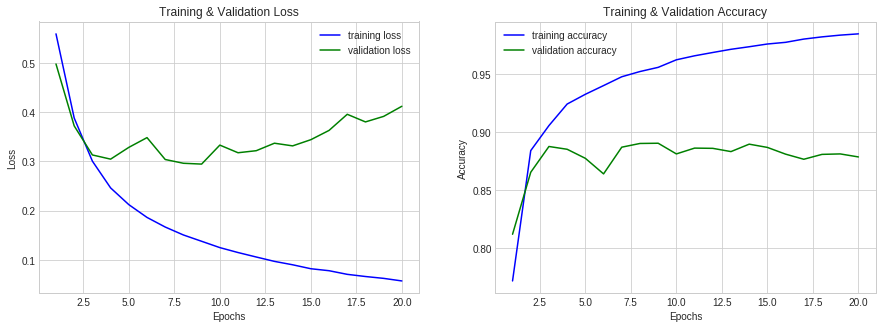

In [28]:
loss = history_1.history["loss"]
val_loss = history_1.history["val_loss"]
acc = history_1.history["accuracy"]
val_acc = history_1.history["val_accuracy"]
epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(figsize=(15, 5), ncols=2, nrows=1)
ax[0].plot(epochs, loss, "b", label="training loss")
ax[0].plot(epochs, val_loss, "g", label="validation loss")
ax[0].set(title="Training & Validation Loss", xlabel="Epochs", ylabel="Loss")
ax[0].legend()

ax[1].plot(epochs, acc, "b", label="training accuracy")
ax[1].plot(epochs, val_acc, "g", label="validation accuracy")
ax[1].set(title="Training & Validation Accuracy", xlabel="Epochs", ylabel="Accuracy")
ax[1].legend()

plt.show()

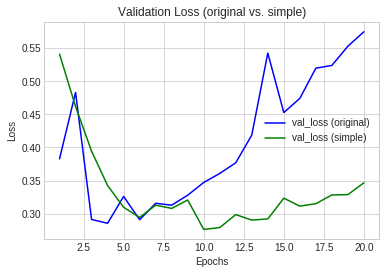

In [33]:
val_loss_model_1 = history.history["val_loss"]
val_loss_model_2 = history_1.history["val_loss"]
epochs = range(1, len(val_loss_model_1) + 1)

plt.plot(epochs, val_loss_model_1, "b", label="val_loss (original)")
plt.plot(epochs, val_loss_model_2, "g", label="val_loss (simple)")
plt.legend()
plt.title("Validation Loss (original vs. simple)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [34]:
model = keras.Sequential([
                          keras.layers.Dense(512, activation="relu", input_shape=(10000,)),
                          keras.layers.Dense(512, activation="relu"),
                          keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
history_2 = model.fit(X_train, y_train, epochs=20, batch_size=512, 
                      validation_data=(X_valid, y_valid))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 12s 579us/sample - loss: 0.6310 - accuracy: 0.7492 - val_loss: 0.4288 - val_accuracy: 0.8096
Epoch 2/20
20000/20000 [==============================] - 11s 551us/sample - loss: 0.3105 - accuracy: 0.8831 - val_loss: 0.2754 - val_accuracy: 0.8920
Epoch 3/20
20000/20000 [==============================] - 11s 543us/sample - loss: 0.2075 - accuracy: 0.9207 - val_loss: 0.2966 - val_accuracy: 0.8952
Epoch 4/20
20000/20000 [==============================] - 11s 542us/sample - loss: 0.1187 - accuracy: 0.9546 - val_loss: 0.3270 - val_accuracy: 0.8990
Epoch 5/20
20000/20000 [==============================] - 11s 547us/sample - loss: 0.1022 - accuracy: 0.9765 - val_loss: 0.3896 - val_accuracy: 0.8924
Epoch 6/20
20000/20000 [==============================] - 11s 543us/sample - loss: 0.1964 - accuracy: 0.9809 - val_loss: 0.3553 - val_accuracy: 0.8970
Epoch 7/20
20000/20000 [=====================

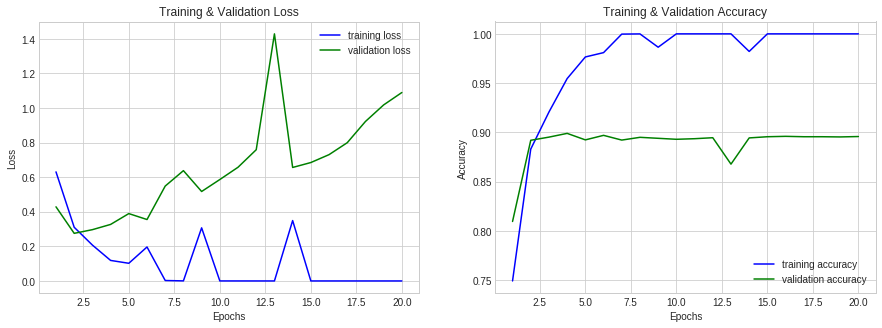

In [35]:
loss = history_2.history["loss"]
val_loss = history_2.history["val_loss"]
acc = history_2.history["accuracy"]
val_acc = history_2.history["val_accuracy"]
epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(figsize=(15, 5), ncols=2, nrows=1)
ax[0].plot(epochs, loss, "b", label="training loss")
ax[0].plot(epochs, val_loss, "g", label="validation loss")
ax[0].set(title="Training & Validation Loss", xlabel="Epochs", ylabel="Loss")
ax[0].legend()

ax[1].plot(epochs, acc, "b", label="training accuracy")
ax[1].plot(epochs, val_acc, "g", label="validation accuracy")
ax[1].set(title="Training & Validation Accuracy", xlabel="Epochs", ylabel="Accuracy")
ax[1].legend()

plt.show()

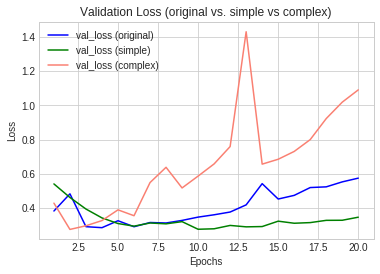

In [37]:
val_loss_model_1 = history.history["val_loss"]
val_loss_model_2 = history_1.history["val_loss"]
val_loss_model_3 = history_2.history["val_loss"]
epochs = range(1, len(val_loss_model_1) + 1)

plt.plot(epochs, val_loss_model_1, "b", label="val_loss (original)")
plt.plot(epochs, val_loss_model_2, "g", label="val_loss (simple)")
plt.plot(epochs, val_loss_model_3, "salmon", label="val_loss (complex)")
plt.legend()
plt.title("Validation Loss (original vs. simple vs complex)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [38]:
model = keras.Sequential([
                          keras.layers.Dense(16, activation="relu", input_shape=(10000,), 
                                             kernel_regularizer=keras.regularizers.l2(0.001)),
                          keras.layers.Dense(16, activation="relu",
                                             kernel_regularizer=keras.regularizers.l2(0.001)),
                          keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
history_3 = model.fit(X_train, y_train, epochs=20, batch_size=512, 
                      validation_data=(X_valid, y_valid))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 125us/sample - loss: 0.5546 - accuracy: 0.7679 - val_loss: 0.4516 - val_accuracy: 0.8326
Epoch 2/20
20000/20000 [==============================] - 2s 93us/sample - loss: 0.3675 - accuracy: 0.8883 - val_loss: 0.4025 - val_accuracy: 0.8672
Epoch 3/20
20000/20000 [==============================] - 2s 95us/sample - loss: 0.3096 - accuracy: 0.9079 - val_loss: 0.4186 - val_accuracy: 0.8470
Epoch 4/20
20000/20000 [==============================] - 2s 91us/sample - loss: 0.2792 - accuracy: 0.9207 - val_loss: 0.4133 - val_accuracy: 0.8636
Epoch 5/20
20000/20000 [==============================] - 2s 90us/sample - loss: 0.2670 - accuracy: 0.9244 - val_loss: 0.3423 - val_accuracy: 0.8892
Epoch 6/20
20000/20000 [==============================] - 2s 90us/sample - loss: 0.2544 - accuracy: 0.9297 - val_loss: 0.3384 - val_accuracy: 0.8892
Epoch 7/20
20000/20000 [==============================] 

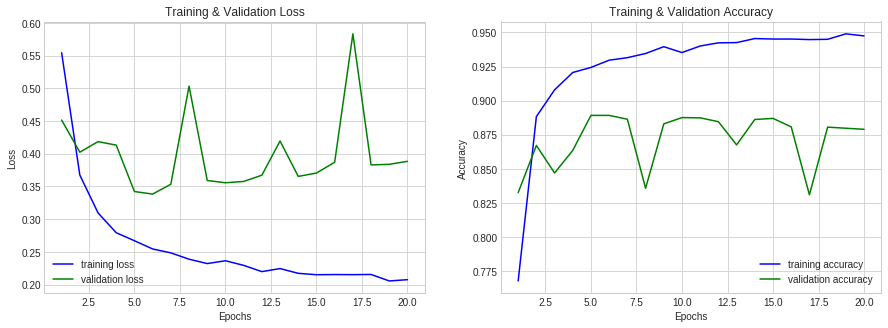

In [39]:
loss = history_3.history["loss"]
val_loss = history_3.history["val_loss"]
acc = history_3.history["accuracy"]
val_acc = history_3.history["val_accuracy"]
epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(figsize=(15, 5), ncols=2, nrows=1)
ax[0].plot(epochs, loss, "b", label="training loss")
ax[0].plot(epochs, val_loss, "g", label="validation loss")
ax[0].set(title="Training & Validation Loss", xlabel="Epochs", ylabel="Loss")
ax[0].legend()

ax[1].plot(epochs, acc, "b", label="training accuracy")
ax[1].plot(epochs, val_acc, "g", label="validation accuracy")
ax[1].set(title="Training & Validation Accuracy", xlabel="Epochs", ylabel="Accuracy")
ax[1].legend()

plt.show()

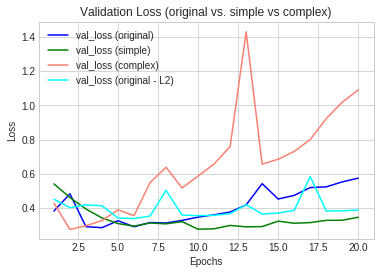

In [40]:
val_loss_model_1 = history.history["val_loss"]
val_loss_model_2 = history_1.history["val_loss"]
val_loss_model_3 = history_2.history["val_loss"]
val_loss_model_4 = history_3.history["val_loss"]
epochs = range(1, len(val_loss_model_1) + 1)

plt.plot(epochs, val_loss_model_1, "b", label="val_loss (original)")
plt.plot(epochs, val_loss_model_2, "g", label="val_loss (simple)")
plt.plot(epochs, val_loss_model_3, "salmon", label="val_loss (complex)")
plt.plot(epochs, val_loss_model_4, "cyan", label="val_loss (original - L2)")
plt.legend()
plt.title("Validation Loss (original vs. simple vs complex)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [41]:
model = keras.Sequential([
                          keras.layers.Dense(16, activation="relu", input_shape=(10000,)),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(16, activation="relu"),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
history_4 = model.fit(X_train, y_train, epochs=20, batch_size=512, 
                      validation_data=(X_valid, y_valid))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 122us/sample - loss: 0.6870 - accuracy: 0.5842 - val_loss: 0.6408 - val_accuracy: 0.7566
Epoch 2/20
20000/20000 [==============================] - 2s 92us/sample - loss: 0.6070 - accuracy: 0.7326 - val_loss: 0.5573 - val_accuracy: 0.7396
Epoch 3/20
20000/20000 [==============================] - 2s 91us/sample - loss: 0.5369 - accuracy: 0.8074 - val_loss: 0.5006 - val_accuracy: 0.7770
Epoch 4/20
20000/20000 [==============================] - 2s 91us/sample - loss: 0.4751 - accuracy: 0.8516 - val_loss: 0.4384 - val_accuracy: 0.8722
Epoch 5/20
20000/20000 [==============================] - 2s 93us/sample - loss: 0.4311 - accuracy: 0.8723 - val_loss: 0.4436 - val_accuracy: 0.8392
Epoch 6/20
20000/20000 [==============================] - 2s 92us/sample - loss: 0.3956 - accuracy: 0.8865 - val_loss: 0.3861 - val_accuracy: 0.8818
Epoch 7/20
20000/20000 [==============================] 

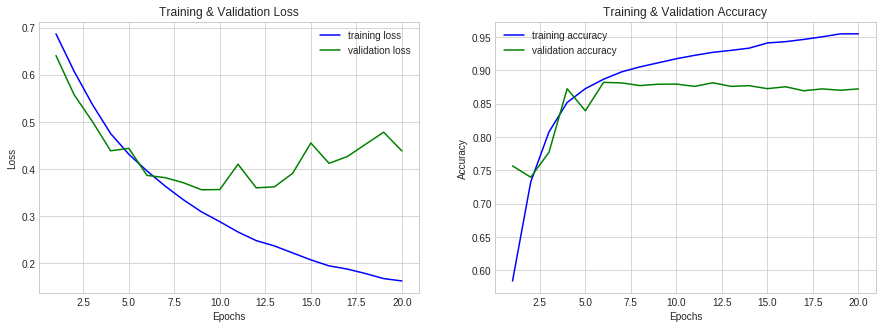

In [42]:
loss = history_4.history["loss"]
val_loss = history_4.history["val_loss"]
acc = history_4.history["accuracy"]
val_acc = history_4.history["val_accuracy"]
epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(figsize=(15, 5), ncols=2, nrows=1)
ax[0].plot(epochs, loss, "b", label="training loss")
ax[0].plot(epochs, val_loss, "g", label="validation loss")
ax[0].set(title="Training & Validation Loss", xlabel="Epochs", ylabel="Loss")
ax[0].legend()

ax[1].plot(epochs, acc, "b", label="training accuracy")
ax[1].plot(epochs, val_acc, "g", label="validation accuracy")
ax[1].set(title="Training & Validation Accuracy", xlabel="Epochs", ylabel="Accuracy")
ax[1].legend()

plt.show()

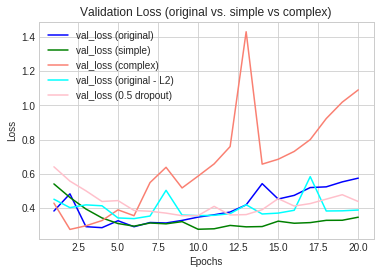

In [43]:
val_loss_model_1 = history.history["val_loss"]
val_loss_model_2 = history_1.history["val_loss"]
val_loss_model_3 = history_2.history["val_loss"]
val_loss_model_4 = history_3.history["val_loss"]
val_loss_model_5 = history_4.history["val_loss"]
epochs = range(1, len(val_loss_model_1) + 1)

plt.plot(epochs, val_loss_model_1, "b", label="val_loss (original)")
plt.plot(epochs, val_loss_model_2, "g", label="val_loss (simple)")
plt.plot(epochs, val_loss_model_3, "salmon", label="val_loss (complex)")
plt.plot(epochs, val_loss_model_4, "cyan", label="val_loss (original - L2)")
plt.plot(epochs, val_loss_model_5, "pink", label="val_loss (0.5 dropout)")
plt.legend()
plt.title("Validation Loss (original vs. simple vs complex)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()